In [14]:
import pandas as pd 
from answer import *
import matplotlib.pyplot as plt
import seaborn as sns
# import answer_ as am

In [15]:
sing_df = pd.read_excel("sheets/land_use_constrained_data.xlsx", sheet_name=1, header=5, usecols="B:V", nrows=9)

sf_df = pd.read_excel("sheets/land_use_constrained_data.xlsx", sheet_name=1, header=55, usecols="B:Z", nrows=11)

# San Francisco

In [16]:
sf = Answer(sf_df, shift=14)
print(sf.qol.columns)


Index(['% residents with high school degrees', '% residents employed',
       '% households below 200% of poverty rate',
       '% population living in households without English spoken "very well"',
       'Preventable hospitalization rate (per 100K people)',
       'Violent crime rate (per 1K people)'],
      dtype='object')


In [17]:
# collect pcs based on observing figures below 
sf.create_pca_df(sig=[2,1,1,1])
sf.pca_df

,landuse_PC1,landuse_PC2,dists_PC1,costs_PC1,qol_PC1
0,-1.013057,0.334324,4.329240,-0.935414,1.328353
1,-0.680563,-0.050090,-0.602524,-0.200446,3.196476
2,1.817530,-1.920023,-0.449115,0.534522,-1.803967
3,-1.265309,0.235576,1.303339,1.707126,-0.929215
4,-0.352126,-1.231583,-1.226586,0.534522,-0.571318
5,4.168958,-0.298488,-1.659390,2.442095,-0.153238
6,-1.068996,0.577262,1.581315,-0.200446,1.620599
7,-1.227215,0.259811,1.253886,-0.200446,2.790784
8,-0.522971,-0.616325,-1.319648,0.534522,-0.606619
9,1.543015,3.163552,-1.238337,-2.108018,-2.924697


### PCA Figs

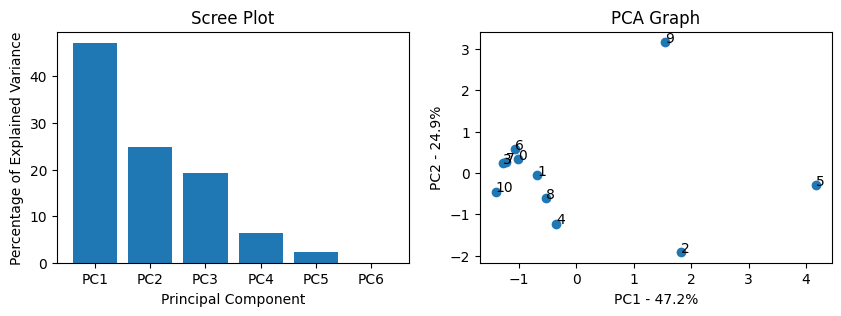

In [18]:
sf.pca_figs[0]

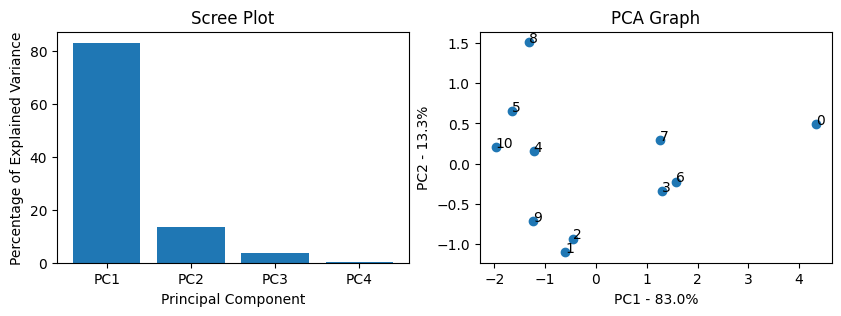

In [19]:
sf.pca_figs[1]

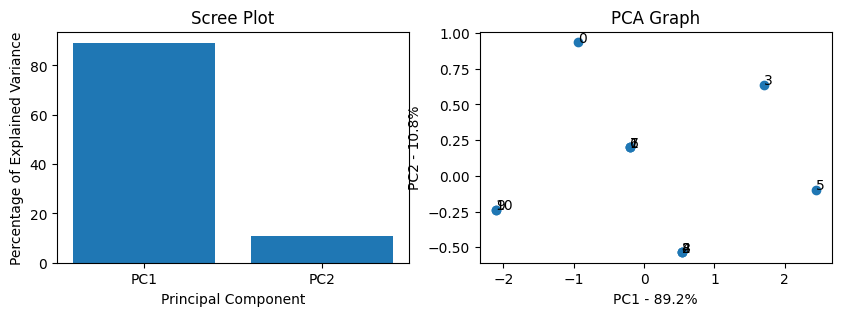

In [20]:
sf.pca_figs[2]

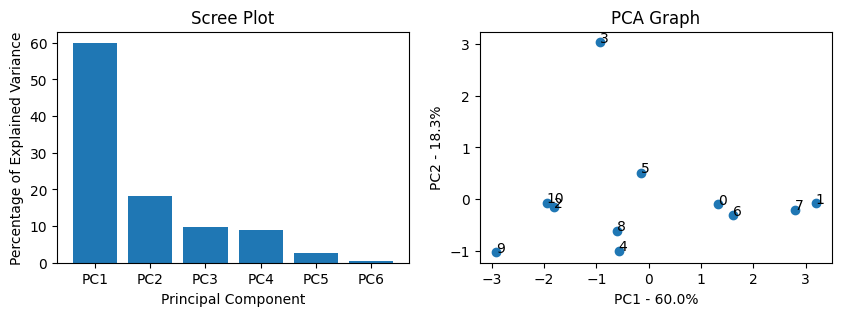

In [21]:
sf.pca_figs[3]

### PCA Correlations

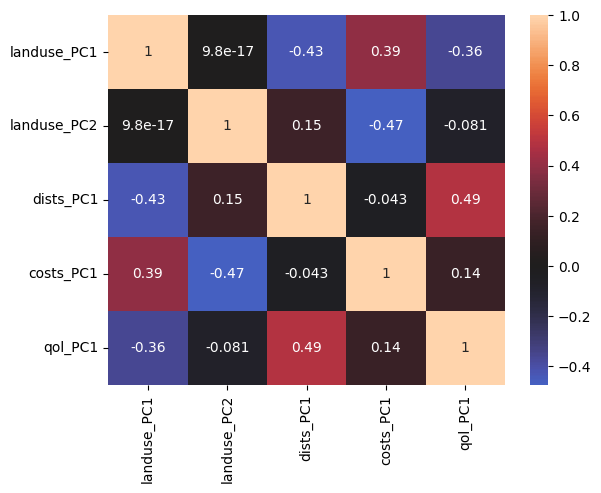

In [22]:
sf.analyze_pca_corr()

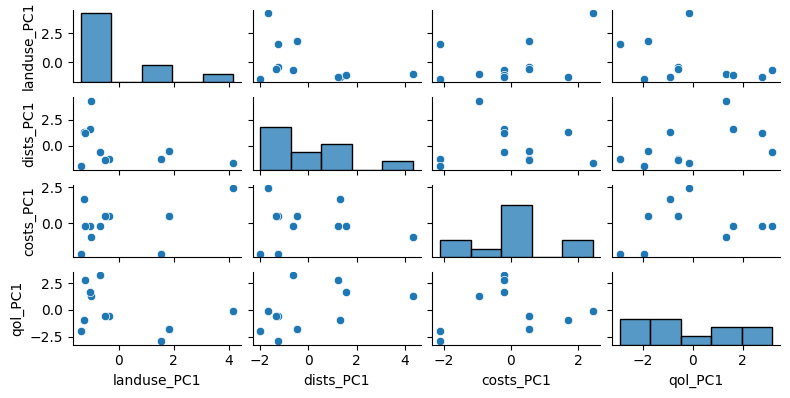

In [23]:
sf.create_sig_pca_df(col_ix=[0,2,3,4]) # use the 2nd qol PC

In [24]:
sf.sig_pca_df

,landuse_PC1,dists_PC1,costs_PC1,qol_PC1
0,-1.013057,4.329240,-0.935414,1.328353
1,-0.680563,-0.602524,-0.200446,3.196476
2,1.817530,-0.449115,0.534522,-1.803967
3,-1.265309,1.303339,1.707126,-0.929215
4,-0.352126,-1.226586,0.534522,-0.571318
5,4.168958,-1.659390,2.442095,-0.153238
6,-1.068996,1.581315,-0.200446,1.620599
7,-1.227215,1.253886,-0.200446,2.790784
8,-0.522971,-1.319648,0.534522,-0.606619
9,1.543015,-1.238337,-2.108018,-2.924697


### Random Forest Result

In [25]:
sf.run_rf()

/Users/julietnwagwuume-ezeoke/_ClassCode/CEE224InfraLocal/final_project/answer.py:131: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


In [27]:
sf.r2s

[-1.302017523469152, -1.2306431874805082, -0.5850489440817552]

#### Random Forest Figs

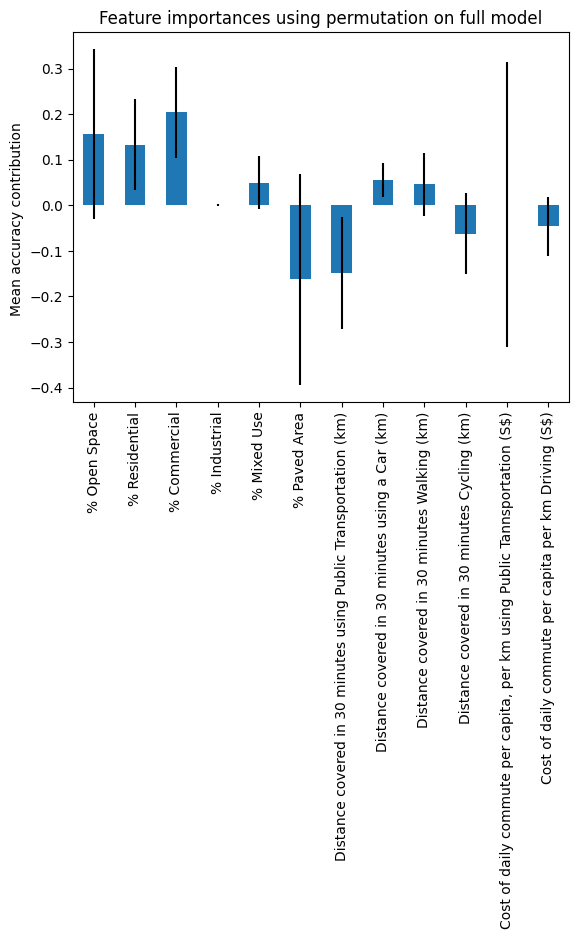

In [28]:
sf.rf_figs[0]

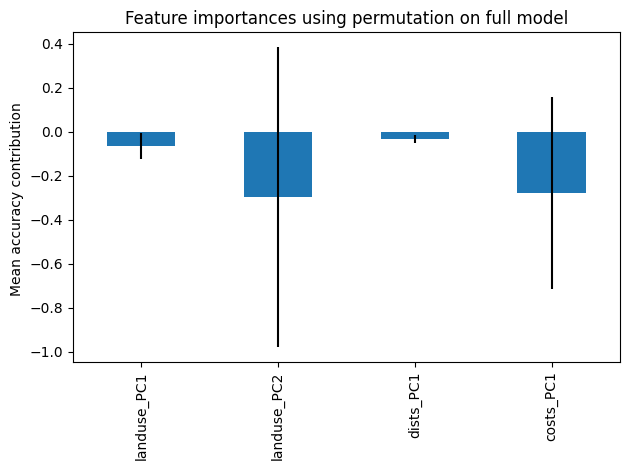

In [29]:
sf.rf_figs[1]

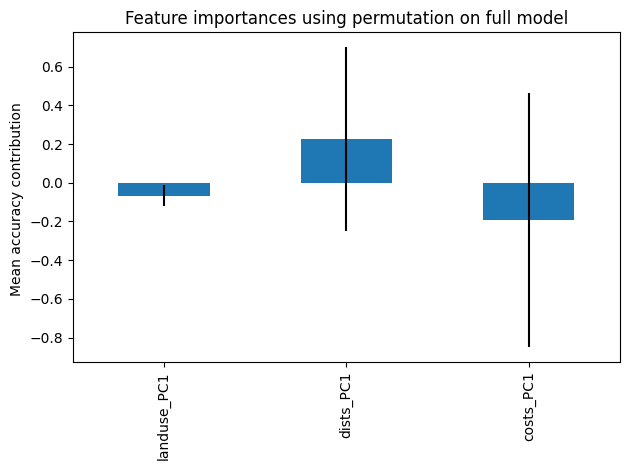

In [30]:
sf.rf_figs[2]

# Singapore 

In [31]:
sing = Answer(sing_df)

In [32]:
sing.create_pca_df()

### PCA Figs

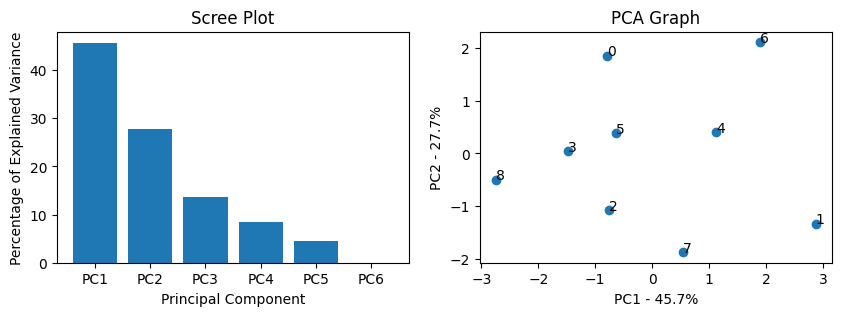

In [33]:
sing.pca_figs[0]

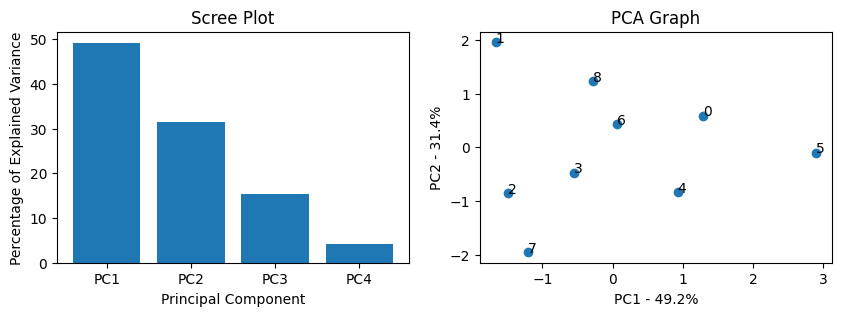

In [34]:
sing.pca_figs[1]

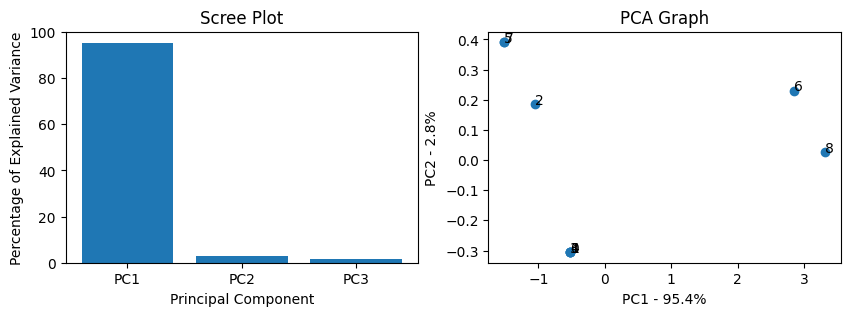

In [35]:
sing.pca_figs[2]

### PCA Correlations

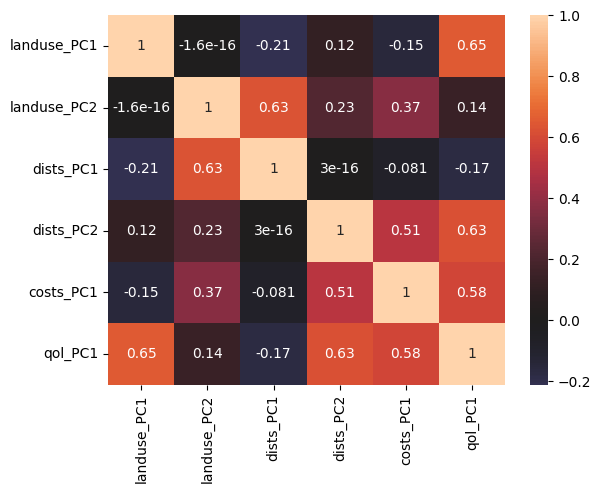

In [36]:
sing.analyze_pca_corr()

In [37]:
sing.corr_map

<AxesSubplot: >

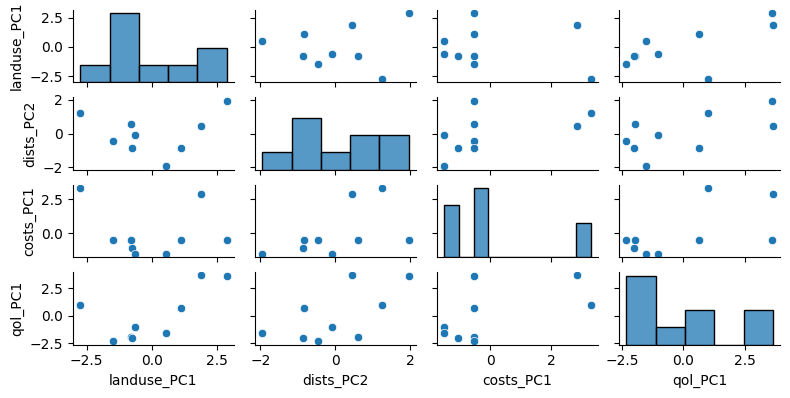

In [38]:
sing.create_sig_pca_df()


In [39]:
sing.sig_pca_df

,landuse_PC1,dists_PC2,costs_PC1,qol_PC1
0,-0.796598,0.588870,-0.520357,-1.973704
1,2.871224,1.952562,-0.520357,3.599082
2,-0.758982,-0.855300,-1.045616,-2.021887
3,-1.474902,-0.467392,-0.520357,-2.317609
4,1.123259,-0.836605,-0.520357,0.648939
5,-0.635362,-0.096957,-1.510600,-1.022627
6,1.884922,0.430925,2.841630,3.636619
7,0.533765,-1.946987,-1.510600,-1.537915
8,-2.747326,1.230884,3.306614,0.989102


## Random Forest Result

In [40]:
sing.run_rf()

/Users/julietnwagwuume-ezeoke/_ClassCode/CEE224InfraLocal/final_project/answer.py:131: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


In [41]:
sing.r2s

[-1.6328229046501106, 0.09708402287041351, 0.5148683658482935]

#### Random Forest Figs

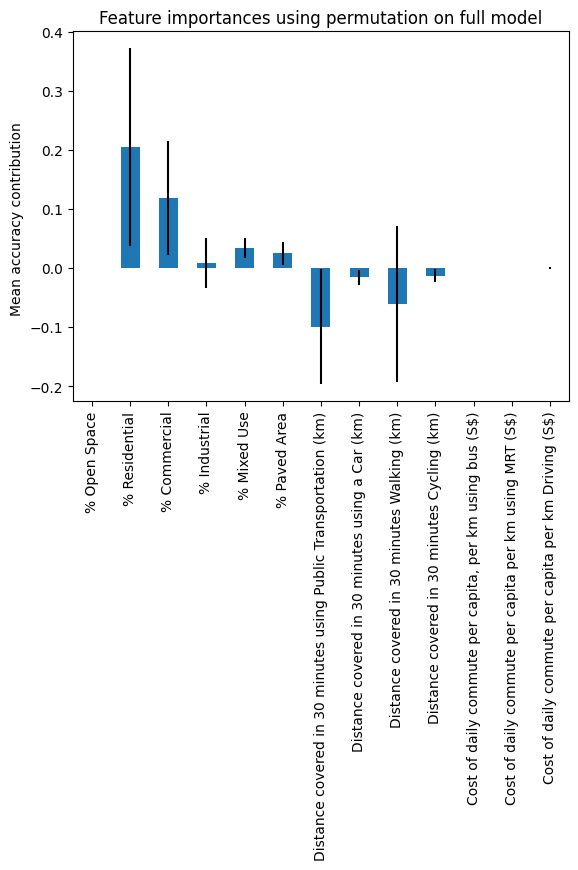

In [42]:
sing.rf_figs[0]

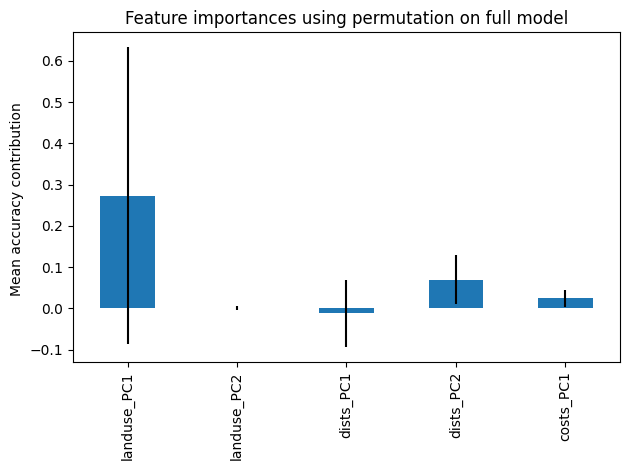

In [54]:
sing.rf_figs[1]

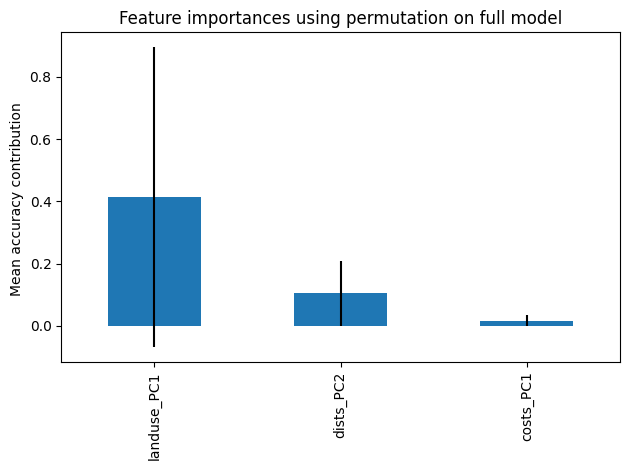

In [55]:
sing.rf_figs[2]

# Summary

In [43]:
sf.r2s

[-1.302017523469152, -1.2306431874805082, -0.5850489440817552]

In [44]:
sing.r2s

[-1.6328229046501106, 0.09708402287041351, 0.5148683658482935]

In [51]:
pd.DataFrame(data=[sf.r2s, sing.r2s], index=["San Francisco", "Singapore"], columns=["Exp 1 - Original Data", "Exp 2 - All PC", "Exp 3 - Filtered PC"]).T

,San Francisco,Singapore
Exp 1 - Original Data,-1.302018,-1.632823
Exp 2 - All PC,-1.230643,0.097084
Exp 3 - Filtered PC,-0.585049,0.514868
